<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [33]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [34]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [35]:
 df = df[['title', 'company', 'description']].drop_duplicates()

In [36]:
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [37]:
df.tail()

,title,company,description
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’..."
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...
1299,Senior Data Scientist,Spring Discovery,tl;dr\nSpring is accelerating the discovery of...


In [38]:
df['description'] = df['description'].apply(lambda x: x.lower())

In [39]:
 df['description'].tail()

1288    our expert delivery & business intelligence te...
1294    music for everyone, no credit card needed. it’...
1295    senior data & applied scientist\ndo you have a...
1297    ebay is a global commerce leader that allows y...
1299    tl;dr\nspring is accelerating the discovery of...
Name: description, dtype: object

In [40]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text) for token in doc]
    doc_tokens = [token for token in doc_tokens if token]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].tail()

1288    [our, expert, delivery, business, intelligence...
1294    [music, for, everyone, no, credit, card, neede...
1295    [senior, data, applied, scientist, do, you, ha...
1297    [ebay, is, a, global, commerce, leader, that, ...
1299    [tldr, spring, is, accelerating, the, discover...
Name: tokens, dtype: object

In [41]:
df['tokens']

0       [job, details, description, essential, duties,...
2       [as, a, team, member, in, the, finance, and, i...
4       [overview, american, credit, acceptance, seeks...
5       [jp, morgans, corporate, investment, bank, cib...
6       [at, vystar, we, offer, competitive, pay, an, ...
                              ...                        
1288    [our, expert, delivery, business, intelligence...
1294    [music, for, everyone, no, credit, card, neede...
1295    [senior, data, applied, scientist, do, you, ha...
1297    [ebay, is, a, global, commerce, leader, that, ...
1299    [tldr, spring, is, accelerating, the, discover...
Name: tokens, Length: 757, dtype: object

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [42]:
### 이곳에서 과제를 진행해 주세요 ### 
from collections import Counter

def word_count(docs):
 # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')


In [43]:
new = word_count(df['tokens'])
new[new['rank']<=10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
2,and,755,21864,1.0,0.056456,0.056456,0.997358
180,to,754,12694,2.0,0.032778,0.089233,0.996037
225,the,745,10538,3.0,0.027210,0.116444,0.984148
188,of,745,8839,4.0,0.022823,0.139267,0.984148
122,data,740,7425,5.0,0.019172,0.158440,0.977543
11,in,748,6769,6.0,0.017478,0.175918,0.988111
116,a,739,6436,7.0,0.016619,0.192537,0.976222
54,with,742,5727,8.0,0.014788,0.207324,0.980185
562,for,727,4132,9.0,0.010669,0.217994,0.960370
117,or,708,3812,10.0,0.009843,0.227837,0.935271


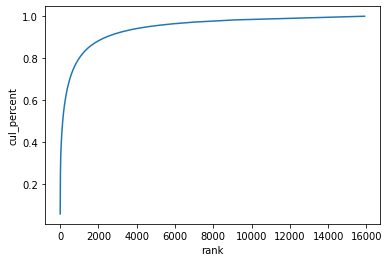

In [44]:
import seaborn as sns
sns.lineplot(x='rank', y='cul_percent', data=new)


### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [45]:
STOP_WORD = nlp.Defaults.stop_words.union(["data", "work"])
tokens = []
# 토큰에서 불용어 제거, 소문자화 하여 업데이트
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        if token not in STOP_WORD:
            doc_tokens.append(token)
    tokens.append(doc_tokens)

df['tokens'] = tokens



In [46]:
!pip install squarify

In [47]:
new = word_count(df['tokens'])
new.sort_values(by=['rank'])[:10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
153,experience,705,3450,1.0,0.014410,0.014410,0.931308
482,business,536,2064,2.0,0.008621,0.023030,0.708058
107,science,611,1648,3.0,0.006883,0.029913,0.807133
154,team,588,1625,4.0,0.006787,0.036701,0.776750
469,learning,526,1596,5.0,0.006666,0.043367,0.694848
115,analysis,516,1349,6.0,0.005634,0.049001,0.681638
123,skills,547,1251,7.0,0.005225,0.054226,0.722589
272,machine,470,1152,8.0,0.004812,0.059038,0.620872
228,analytics,428,1136,9.0,0.004745,0.063782,0.565390
105,models,459,1034,10.0,0.004319,0.068101,0.606341


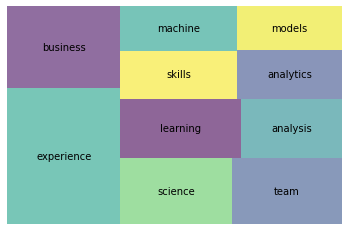

In [18]:
import squarify
import matplotlib.pyplot as plt

wdf = word_count(df['tokens'])

wdf_20 = wdf[wdf['rank'] <= 10]

squarify.plot(sizes=wdf_20['percent'], label=wdf_20['word'], alpha=0.6)
plt.axis('off')
plt.show()


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [63]:
### 이곳에서 과제를 진행해 주세요 ### 
import spacy
from spacy.tokenizer import Tokenizer

tokens = []
for doc in tokenizer.pipe(df['description']):
  doc_tokens = []
  for token in doc:
        token = token.lemma_
        token = re.sub(r"[^a-z0-9]","", token)
        if token not in STOP_WORD:
            doc_tokens.append(token)
  doc_tokens = [token for token in doc_tokens if token]
  tokens.append(doc_tokens)

df['lemmas'] = tokens

In [58]:
df['lemmas']

0       [job, detail, description, essential, duty, re...
2       [team, member, finance, internal, audit, depar...
4       [overview, american, credit, acceptance, seek,...
5       [jp, morgan, s, corporate, investment, bank, c...
6       [vystar, offer, competitive, pay, excellent, b...
                              ...                        
1288    [expert, delivery, business, intelligence, tea...
1294    [music, credit, card, need, promise, platform,...
1295    [senior, applied, scientist, passion, datum, m...
1297    [ebay, global, commerce, leader, allow, shape,...
1299    [tldr, spring, accelerate, discovery, therapy,...
Name: lemmas, Length: 757, dtype: object

In [67]:
new2 = word_count(df['lemmas'])
new2[new2['rank'] <=10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
12,datum,737,6825,1.0,0.027826,0.027826,0.973580
153,experience,708,3634,2.0,0.014816,0.042642,0.935271
154,team,630,2126,3.0,0.008668,0.051310,0.832232
471,business,540,2115,4.0,0.008623,0.059933,0.713342
109,science,615,1700,5.0,0.006931,0.066865,0.812417
114,analysis,537,1534,6.0,0.006254,0.073119,0.709379
262,use,575,1522,7.0,0.006205,0.079324,0.759577
206,model,513,1488,8.0,0.006067,0.085391,0.677675
104,learn,542,1440,9.0,0.005871,0.091262,0.715984
274,machine,470,1155,10.0,0.004709,0.095971,0.620872


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 7) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [74]:
### 이곳에서 과제를 진행해 주세요 ### 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 벡터화 함수 호출
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
# 벡터화 훈련
dtm_desc = tfidf.fit_transform(df['description'])
dtm_desc = pd.DataFrame(dtm_desc.todense(),columns = tfidf.get_feature_names() )



nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_desc)
nn.kneighbors([dtm_desc.iloc[88]])

(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))